# Tests de différents modèles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from zipfile import ZipFile

import datetime
import json
import re
import shutil

from tqdm import tqdm

import seaborn as sns

import ipywidgets
import os

In [2]:
file_path = os.getcwd() + "/data/dataset.csv"

with open(file_path, 'r') as f:
    df = pd.read_csv(file_path, index_col=0)

In [3]:
df

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,Depense_cal_totale,cal_deficit
2020-08-09,107.250000,37.190000,NaN,NaN,NaN,0.346760,1883.296000,1861.3,71.3,245.0,66.1,0.0,0.0,0.000000,1883.296000,-21.996000
2020-08-11,104.650000,33.150000,NaN,NaN,NaN,0.316770,1914.400000,1772.4,50.5,185.8,104.1,0.0,0.0,0.000000,1914.400000,-142.000000
2020-08-12,104.350000,33.800000,NaN,NaN,NaN,0.323910,1893.880000,1894.3,59.3,220.3,87.5,0.0,0.0,0.000000,1893.880000,0.420000
2020-08-13,104.400000,34.340000,NaN,NaN,NaN,0.328927,1883.296000,1822.6,71.5,227.7,70.2,0.0,0.0,0.000000,1883.296000,-60.696000
2020-08-14,104.500000,33.850000,NaN,NaN,NaN,0.323923,1896.040000,1891.5,61.8,217.2,82.5,0.0,0.0,0.000000,1896.040000,-4.540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-11,72.053000,12.060000,2.999000,56.981000,40.106000,0.167377,1665.848800,1551.5,19.4,141.5,204.5,0.0,0.0,0.000000,1665.848800,-114.348800
2023-12-12,71.931818,11.891818,3.001818,57.021818,40.182727,0.165321,1666.864000,1815.4,42.1,185.0,181.5,3240.0,337.0,274.492600,1941.356600,-125.956600
2023-12-13,71.302500,11.513333,2.989167,56.781667,40.017500,0.161472,1661.446000,1794.8,47.5,211.7,126.7,1680.0,243.0,210.694106,1872.140106,-77.340106
2023-12-14,71.490000,10.782727,3.045455,57.647273,41.139091,0.150828,1681.277091,1809.1,60.4,176.6,128.4,3600.0,200.0,129.946788,1811.223879,-2.123879


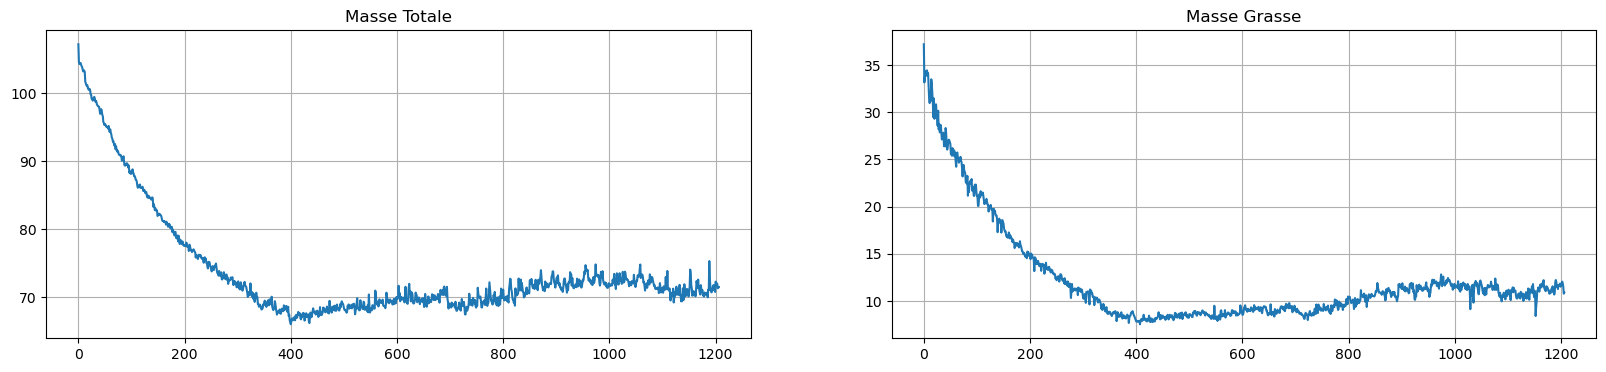

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
# plt.locator_params(axis='x', nticks=10)

ax[0].plot(df['Masse_Totale'].to_numpy())
ax[0].grid()
ax[0].set_title('Masse Totale')

ax[1].plot(df['Masse_Grasse'].to_numpy())
ax[1].grid()
ax[1].set_title('Masse Grasse')

# ax[0] = sns.lineplot(data=df, y='Masse_Totale', ax=ax[0])
# ax[0].grid()
# ax[0].tick_params(axis='x', labelrotation=60)

# ax[1] = sns.lineplot(data=df, x=df.index, y='Masse_Grasse', ax=ax[1])
# ax[1].grid()
# ax[1].tick_params(axis='x', labelrotation=60)

plt.show()

In [5]:
df_model = df.dropna()

In [6]:
columns_to_drop = ['MG%', 'BMR', 'Lipides', 'Glucides', 'Proteines', 'exo_duree', 'exo_cals_bruts', 'Depense_cal_totale', 'cal_deficit']
df_model = df_model.drop(columns=columns_to_drop)

In [7]:
df_model.head(10)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,Calories,exo_cals_nets
2023-03-04,70.656667,11.420000,2.961667,56.258333,39.496667,2271.1,0.000000
2023-03-05,71.880000,11.848571,3.000000,57.014286,40.180000,1774.3,353.867654
2023-03-06,71.030000,10.924000,3.010000,57.082000,40.476000,1759.7,498.562450
2023-03-07,72.185000,11.126667,3.060000,57.986667,41.366667,2516.4,979.099745
2023-03-08,72.283333,10.178333,3.131667,58.956667,42.821667,1658.9,336.012941
2023-03-09,72.158571,10.134286,3.127143,58.882857,42.768571,3428.1,709.697273
2023-03-10,73.675714,10.644286,3.181429,59.834286,43.564286,1830.7,65.951683
2023-03-11,72.780000,10.491667,3.138333,59.133333,42.865000,4222.7,469.663584
2023-03-12,73.335000,11.686667,3.086667,58.546667,41.781667,0.6,585.880608
2023-03-13,71.690000,11.170000,3.031667,57.476667,40.816667,2658.9,220.199850


In [8]:
AVERAGE_DAYS = 7  # période sur laquelle on va moyenner les données quotidiennes pour diminuer le bruit

PERIODE_CALCUL_VARIATION = 7 # delta de calcul de la variation

In [9]:
def create_df(average_days=AVERAGE_DAYS, periode_calcul_variation=PERIODE_CALCUL_VARIATION, df=df):
    """Crée la dataframe avec les paramètres de moyenne passés en argument
    """
    df_model = df.dropna()
    columns_to_drop = ['MG%', 'BMR', 'Lipides', 'Glucides', 'Proteines', 'exo_duree', 'exo_cals_bruts', 'Depense_cal_totale', 'cal_deficit']
    df_model = df_model.drop(columns=columns_to_drop)   
    
    # moyenne toutes les valeurs sur AVERAGE_DAYS
    df_model = df_model.rolling(window=average_days).mean().dropna()
    
    # pour les masses, calcule la variation moyenne quotidienne entre la valeur à J et la valeur à J-PERIODE_CALCUL_VARIATION, et la stocke au jour J.
    list_deltas = ['Masse_Totale', 'Masse_Grasse', 'Masse_Musculaire', 'Masse_Osseuse', 'Masse_Hydrique']
    for nom in list_deltas:
        nom_delta = 'delta_' + nom
        df_model[nom_delta] = (df_model[nom] - df_model[nom].shift(periode_calcul_variation))/periode_calcul_variation
        
    # pour les calories (food, exercices), calcule la moyenne des Calories et calories nettes d'exercice entre J-PERIODE_CALCUL_VARIATION et J, et la stocke au jour J+1
    liste_calories = ['Calories', 'exo_cals_nets']
    for nom in liste_calories:
        nom_cal = 'moyenne_' + nom
        df_model[nom_cal] = df_model[nom].rolling(periode_calcul_variation).mean().shift(1)
        
    df_model.dropna(inplace=True)
    
    # Les données au jour J sont :
    # - la différence entre la valeur des masses à J et les masses à J-PERIODE_DE_VARIATION
    # - les moyennes de calories entre J-PERIODE_DE_VRAIATION-1 et J-1
    
    return df_model

In [10]:
def visu_df(df_model=df_model):
    """visualise 2D et 3D

    Args:
        df_model (_type_, optional): _description_. Defaults to df_model.
    """
    
    # Visu
    
    N_COLS = 4
    N_ROWS = len(df_model.columns)//N_COLS+1

    fig, axs = plt.subplots(nrows=N_ROWS,ncols=N_COLS, figsize=(36,16))

    for i,name in enumerate(df_model.columns):
        r = i%N_ROWS
        c = i//N_COLS
        titre = name + f' - moyenne {AVERAGE_DAYS}j'
        axs[r,c].set_title(titre)
        df_model[name].plot(ax=axs[r,c])
        axs[r,c].grid(True)
        
    plt.show()
        
    # Visu

    columns_to_display = ['delta_Masse_Grasse', 'delta_Masse_Musculaire'] #, 'delta_Masse_Totale', 'delta_Masse_Osseuse', 'delta_Masse_Hydrique']

    # fig, axs = plt.subplots(3,2,figsize=(24,12), subplot_kw={"projection" : "3d"})

    x = df_model['moyenne_Calories']
    y = df_model['moyenne_exo_cals_nets']

    X = np.arange(x.min(), x.max(), 10.0)
    Y = np.arange(y.min(), y.max(), 10.0)
    X, Y = np.meshgrid(X, Y)
    Z = np.zeros(shape=X.shape)

    for i,name in enumerate(columns_to_display):
        z = df_model[name]
        titre = name + f'\ntoutes valeurs moyennées sur {AVERAGE_DAYS} jours' + F'\nvariation quotidienne masses moyennée sur {PERIODE_CALCUL_VARIATION} jours'
        fig, ax = plt.subplots(subplot_kw={"projection" : "3d"}, figsize=(8,8))

        ax.set_title(titre)
        
        c = [ 'blue' if val >= 0 else 'red' for val in z ]
        ax.scatter(x, y, z, label=name, color=c)
        
        ax.plot_surface(X, Y, Z, edgecolor='yellow', lw=0.5, rstride=8, cstride=8, alpha=0.2)

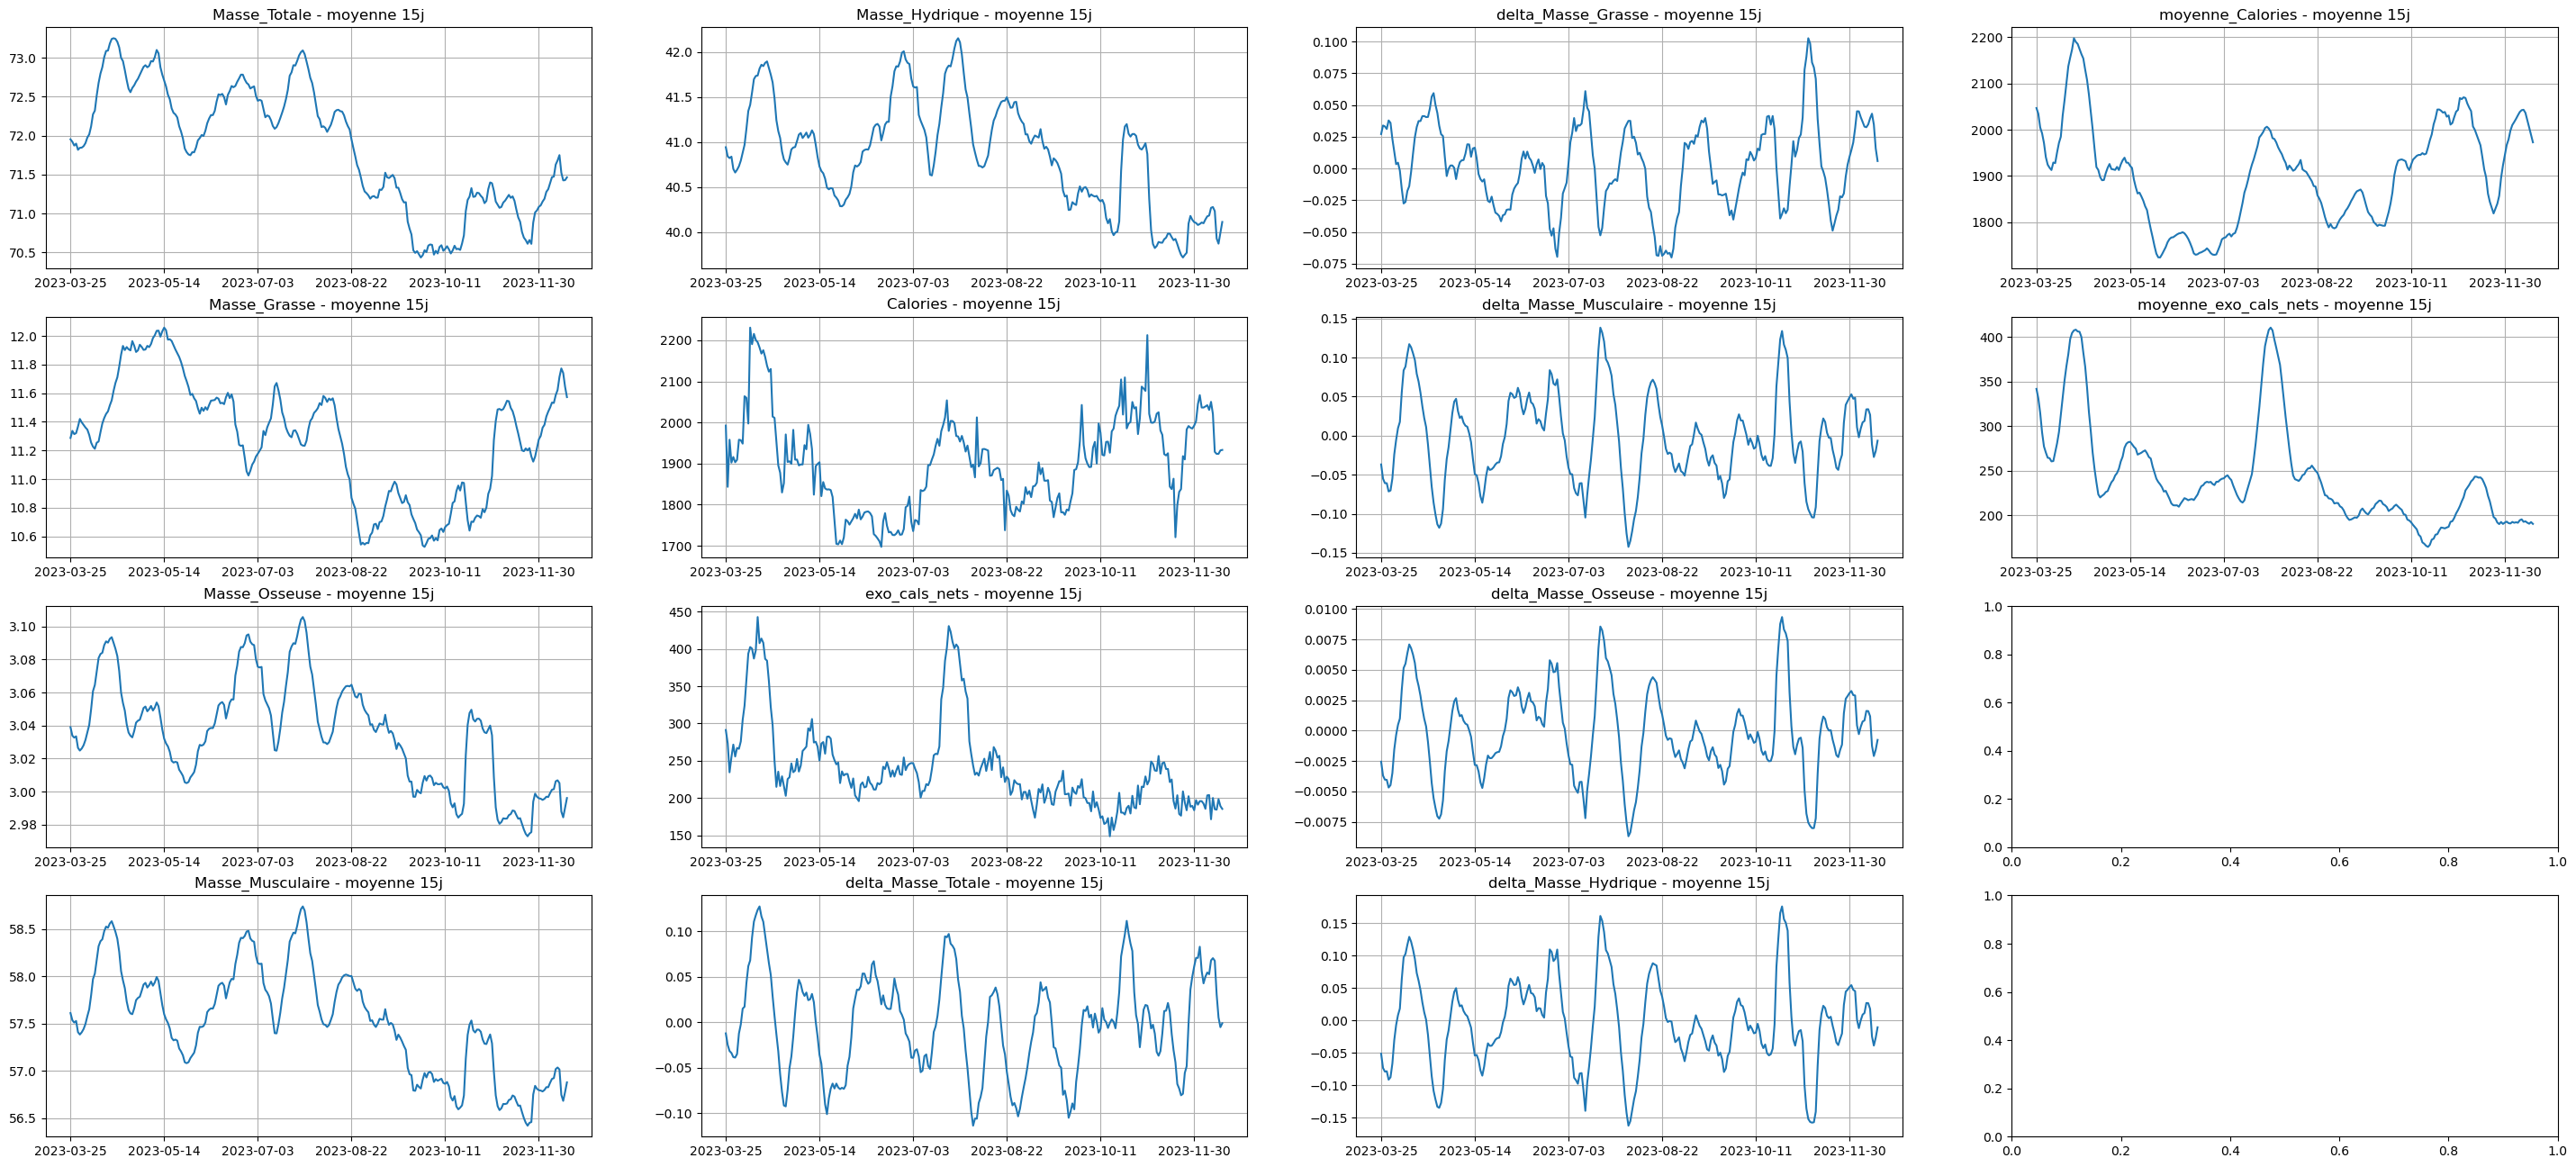

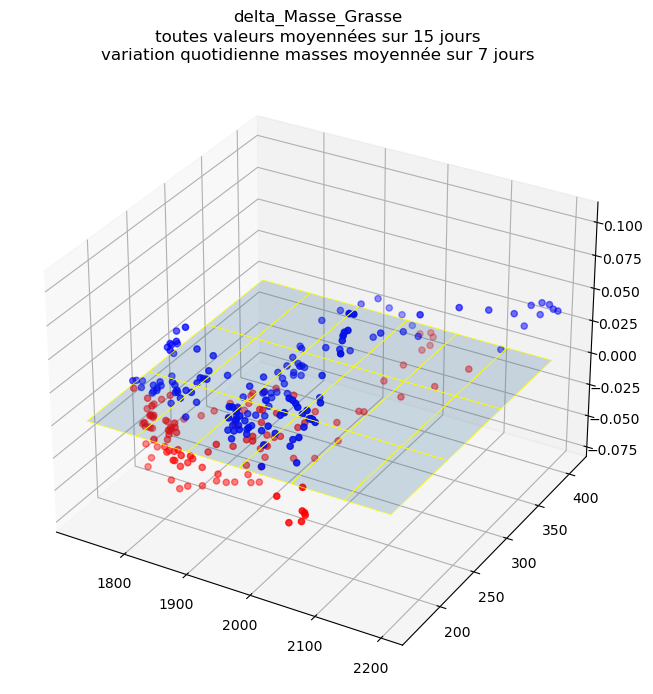

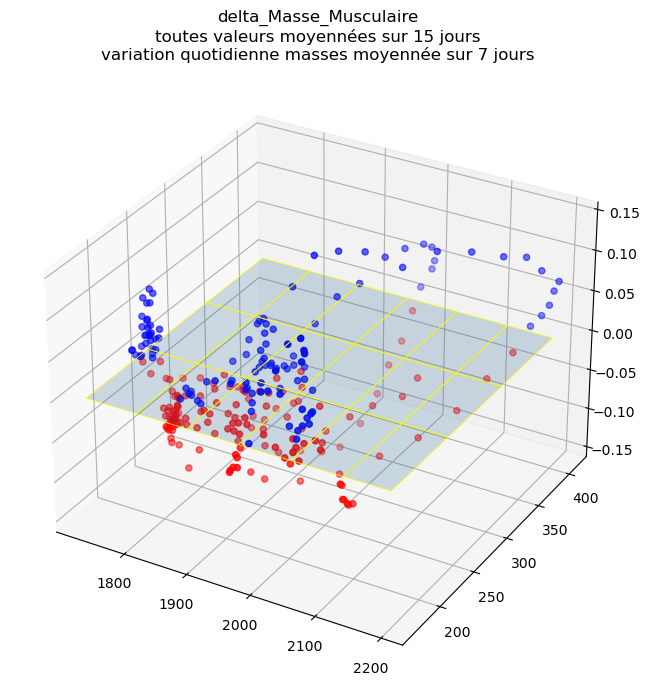

In [11]:
AVERAGE_DAYS = 15  # période sur laquelle on va moyenner les données quotidiennes pour diminuer le bruit
PERIODE_CALCUL_VARIATION = 7 # delta de calcul de la variation

df_model = create_df(average_days=AVERAGE_DAYS, periode_calcul_variation=PERIODE_CALCUL_VARIATION, df=df)

visu_df(df_model=df_model)

In [12]:
df_model.head(20)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,Calories,exo_cals_nets,delta_Masse_Totale,delta_Masse_Grasse,delta_Masse_Musculaire,delta_Masse_Osseuse,delta_Masse_Hydrique,moyenne_Calories,moyenne_exo_cals_nets
2023-03-25,71.951571,11.287302,3.038952,57.610825,40.943302,1992.373333,291.153460,-0.012354,0.027082,-0.036844,-0.002560,-0.051023,2046.671429,341.837587
2023-03-26,71.920143,11.337000,3.033825,57.534984,40.841730,1843.153333,273.483896,-0.024923,0.033833,-0.055028,-0.003705,-0.073010,2034.260952,331.175414
2023-03-27,71.871619,11.314175,3.032619,57.510444,40.823048,1957.913333,234.425189,-0.031728,0.033114,-0.060810,-0.004036,-0.078551,2004.697143,314.700226
2023-03-28,71.896508,11.321286,3.033397,57.527444,40.838937,1902.226667,254.804843,-0.033887,0.031088,-0.060918,-0.004052,-0.078082,1992.102857,292.995478
2023-03-29,71.817270,11.367095,3.026413,57.409317,40.702444,1915.853333,271.588136,-0.038397,0.037823,-0.071476,-0.004685,-0.091057,1971.320000,277.230471
2023-03-30,71.842937,11.420111,3.024778,57.383952,40.662683,1903.133333,255.625694,-0.038905,0.035905,-0.070259,-0.004490,-0.087372,1940.822857,270.428150
2023-03-31,71.845143,11.396619,3.026016,57.407873,40.692857,1908.966667,267.154716,-0.035052,0.023243,-0.054828,-0.003497,-0.066136,1924.304762,264.545604
2023-04-01,71.864032,11.378397,3.028032,57.442603,40.732238,1957.940000,265.928029,-0.012506,0.013014,-0.024032,-0.001560,-0.030152,1917.660000,264.033705
2023-04-02,71.903460,11.360302,3.031270,57.496603,40.794238,1956.806667,275.920151,-0.002383,0.003329,-0.005483,-0.000365,-0.006785,1912.740952,260.430072
2023-04-03,71.975032,11.345762,3.035889,57.577746,40.882698,1948.386667,304.731640,0.014773,0.004512,0.009615,0.000467,0.008522,1928.977143,260.778108
